In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os


In [16]:
warnings.filterwarnings("ignore")


In [17]:
os.environ["OMP_NUM_THREADS"] = "1"

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
df = pd.read_csv("C:/Users/de/Downloads/archive/Mall_Customers.csv")  
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [20]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [21]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


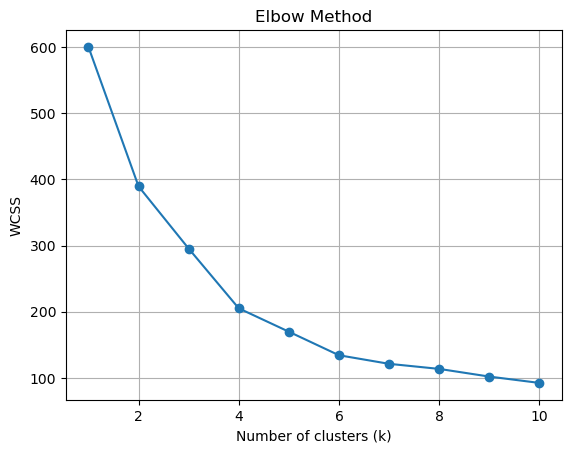

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [24]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    print(f"Silhouette Score for k={k}: {score:.4f}")



Silhouette Score for k=2: 0.3355
Silhouette Score for k=3: 0.3579
Silhouette Score for k=4: 0.4040
Silhouette Score for k=5: 0.4085
Silhouette Score for k=6: 0.4311
Silhouette Score for k=7: 0.4101
Silhouette Score for k=8: 0.3674
Silhouette Score for k=9: 0.3744
Silhouette Score for k=10: 0.3619


In [25]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [26]:
df['Cluster'] = clusters


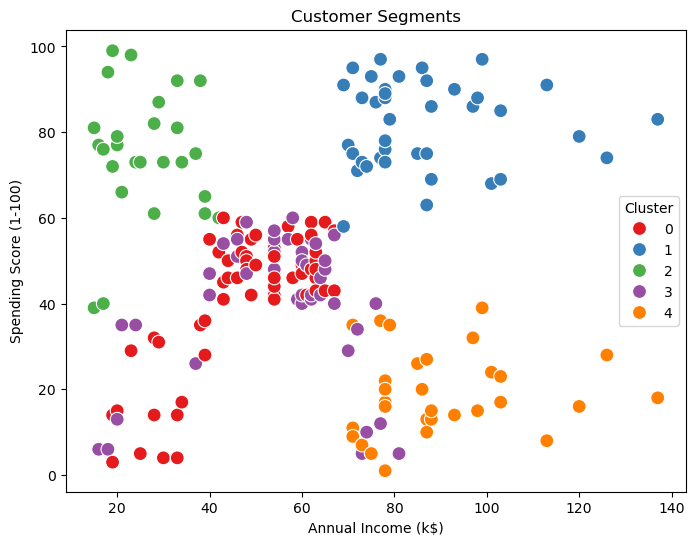

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments")
plt.show()

In [28]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary:\n", cluster_summary)



Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [29]:
df.to_csv("segmented_customers.csv", index=False)